In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
from pandas import datetime
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
import math
import seaborn as sns

Using TensorFlow backend.


In [2]:
import pprint

In [3]:
df=pd.read_csv("PatnerTransaction_new.csv")

In [4]:
df

,Datafeild,TransactionCount,Sourcepartner
0,24-08-2019,2,BKCHCNBJA570
1,26-08-2019,1,CHASUS33JXXX
2,29-09-2019,10,Best Buy Canada
3,05-02-2020,34,Wortmann AG
4,07-02-2020,1,SYNNEXTW
...,...,...,...
286242,29-04-2016,31,"Mentor Media, Chennai"
286243,23-04-2016,2,Tech Data (Alt 2)
286244,31-08-2018,4,TrueScreen
286245,08-07-2018,2,SBNMNANXAXXX


In [5]:
dataset=df
dataset["Month"]=pd.to_datetime(df["Datafeild"]).dt.month
dataset["Year"]=pd.to_datetime(df["Datafeild"]).dt.year
dataset["Date"]=pd.to_datetime(df["Datafeild"]).dt.date
#dataset["Time"]=pd.to_datetime(df["Datafeild"]).dt.time
dataset["Week"]=pd.to_datetime(df["Datafeild"]).dt.week
dataset["Day"]=pd.to_datetime(df["Datafeild"]).dt.day_name()
dataset=df.set_index("Datafeild")
dataset.index=pd.to_datetime(dataset.index)
dataset.head(5)

,TransactionCount,Sourcepartner,Month,Year,Date,Week,Day
Datafeild,,,,,,,
2019-08-24,2,BKCHCNBJA570,8,2019,2019-08-24,34,Saturday
2019-08-26,1,CHASUS33JXXX,8,2019,2019-08-26,35,Monday
2019-09-29,10,Best Buy Canada,9,2019,2019-09-29,39,Sunday
2020-05-02,34,Wortmann AG,5,2020,2020-05-02,18,Saturday
2020-07-02,1,SYNNEXTW,7,2020,2020-07-02,27,Thursday


In [6]:
#dataset['Sourcepartner'].unique()

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Sourcepartner']= label_encoder.fit_transform(df['Sourcepartner']) 
  
df['Sourcepartner'].unique() 


In [7]:
date1=dataset["TransactionCount"]['2020-07-02']

In [8]:
date1

Datafeild
2020-07-02      1
2020-07-02      7
2020-07-02    528
2020-07-02     22
2020-07-02     28
             ... 
2020-07-02      1
2020-07-02      6
2020-07-02     27
2020-07-02    186
2020-07-02     75
Name: TransactionCount, Length: 268, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 737608.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


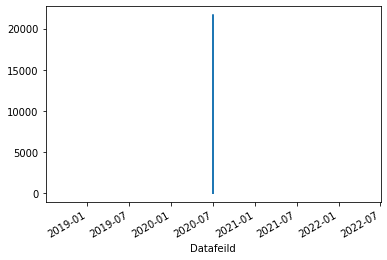

In [9]:
date1.plot()

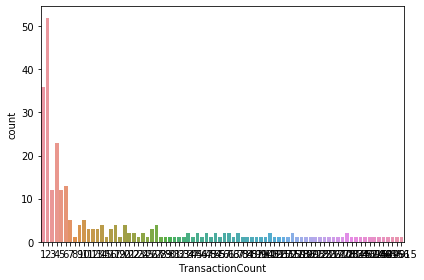

In [10]:
sns.countplot(x=date1)
plt.tight_layout()

In [11]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year",df.Year.nunique(),"\n")

[2019 2020 2015 2016 2018 2017] 

Total Number of Unique Year 6 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'Sourcepartner year')

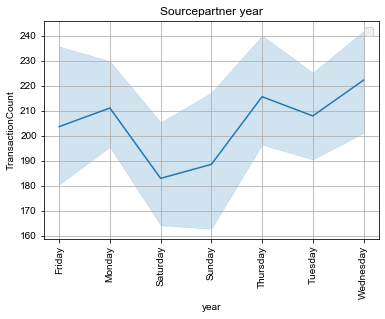

In [12]:
from matplotlib import style
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Day"],y=dataset["TransactionCount"],data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Sourcepartner year ")
plt.xlabel("year")
plt.ylabel("TransactionCount")
plt.grid(True)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
    
    
plt.title("Sourcepartner year")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Sourcepartner year')

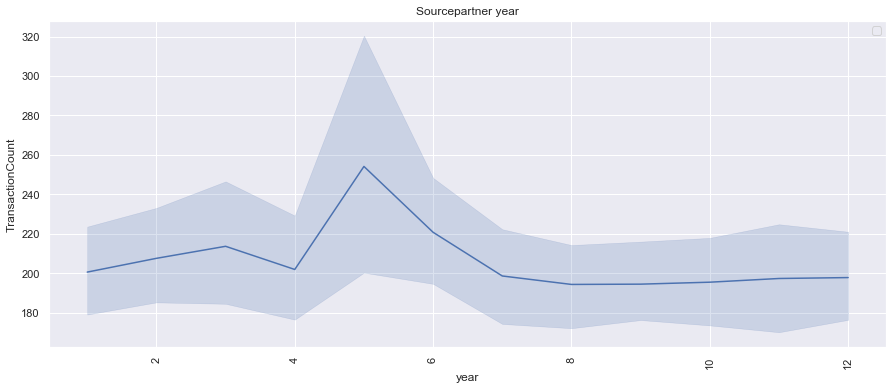

In [13]:
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Month"],y=dataset["TransactionCount"],data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Sourcepartner year ")
plt.xlabel("year")
plt.ylabel("TransactionCount")
plt.grid(True)
plt.legend()


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
    
    
plt.title("Sourcepartner year")

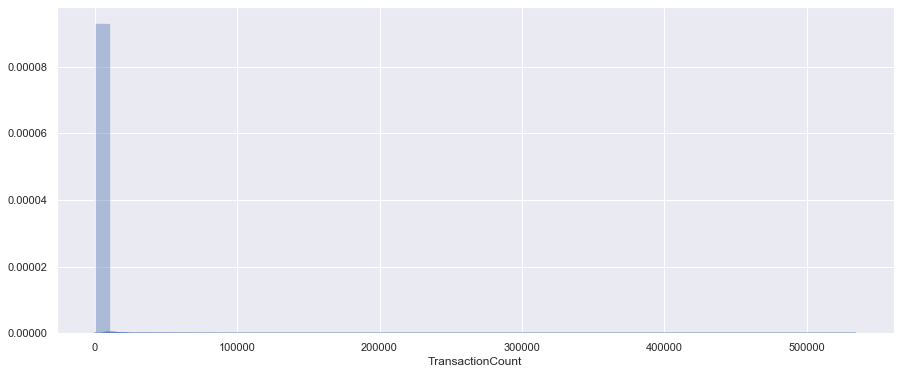

In [14]:
sns.distplot(dataset['TransactionCount'])

fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["TransactionCount"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [15]:
dataset.head()

,TransactionCount,Sourcepartner,Month,Year,Date,Week,Day
Datafeild,,,,,,,
2019-08-24,2,BKCHCNBJA570,8,2019,2019-08-24,34,Saturday
2019-08-26,1,CHASUS33JXXX,8,2019,2019-08-26,35,Monday
2019-09-29,10,Best Buy Canada,9,2019,2019-09-29,39,Sunday
2020-05-02,34,Wortmann AG,5,2020,2020-05-02,18,Saturday
2020-07-02,1,SYNNEXTW,7,2020,2020-07-02,27,Thursday


In [16]:
NewDataSet = dataset.resample('D').mean()

In [17]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (286247, 7)
New  Dataset  (2155, 4)


In [18]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [19]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (2095, 1)
Test Set Shape  (100, 4)


In [20]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [21]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(2035, 60, 1)
(2035, 1)


In [22]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(2035, 60, 1)

In [23]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
 192/2035 [=>............................] - ETA: 38:39 - loss: nan

KeyboardInterrupt: 

In [ ]:
TestData.head(2)

In [ ]:
TestData.shape

In [ ]:
NewDataSet.shape

In [ ]:
Df_Total = pd.concat((NewDataSet[["TransactionCount"]], TestData[["TransactionCount"]]), axis=0)

In [ ]:
Df_Total.shape

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
True_MegaWatt = TestData["TransactionCount"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "Transaction": True_MegaWatt,
    "Predictednext year":[x[0] for x in Predicted_MegaWatt ]
})

In [ ]:
Machine_Df

In [ ]:
True_MegaWatt = TestData["TransactionCount"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("transaction")
plt.title("transaction Predicting Future Values ")
plt.legend()